# PA 1: Exploratory Analysis over 120 years of Olympic History

## Assignment Details

In this assignment, you will conduct a guided exploration over the Olympic History dataset. You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Pandas.

You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

## Dataset Details

In this assignment, we will work on 120 years of Olympic History dataset. Specifically, we will work on athlete_events.csv file from kaggle repository (https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results). The file athlete_events.csv contains 271.116 rows and 15 columns. This dataset begins with the 1896 Athens, Greece Olympics, and runs up to the 2016 Rio, Brazil Olympic Games. Each row corresponds to an athlete competing in an individual Olympic event. The columns of the data-set are:

- ID - Unique number for each athlete
- Name - Athlete's name
- Sex - M or F
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- Team - Team name
- NOC - National Olympic Committee 3-letter code
- Games - Year and season
- Year - Integer
- Season - Summer or Winter
- City - Host city
- Sport - Sport
- Event - Event
- Medal - Gold, Silver, Bronze, or NA

## Importing the required packages

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset
The Python code below reads the Olympic History dataset into a Pandas data frame with the name df_Olympic. 
For this code to work, the file 'athlete_events.csv' must be in the same folder as this file.

In [2]:
#read the csv file into a Pandas data frame
df_olympics = pd.read_csv('athlete_events.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Task 1: Statistical Exploratory Data Analysis
Let us start with getting know the dataset. Your first task will be to get some basic information by using Pandas features.

In [3]:
#For each task below, look for a Pandas function to do the task.
#Replace None in each task with your code.

# 2.5 points
#Task 1-a: Print the details of the df_olympics data frame (information such as number of rows,columns, name of columns, etc)
print (">>Task 1-a: Details of df_olympics data frame are: \n", df_olympics.describe() ) 

# 2.5 points
#Task 1-b: Find the number of rows and columns in the df_olympics data frame.
num_rows = df_olympics.shape[0]
num_cols = df_olympics.shape[1]
print ("\n\n>>Task 1-b: Number of rows:%s and number of columns:%s" % (num_rows, num_cols)) 

# 2.5 points
#Task 1-c: Print the descriptive detail (min, max, quartiles etc) for 'Age' column of  the df_olympics
print ("\n\n>>Task 1-c: Descriptive details of year column are\n",df_olympics['Age'].describe())

# 10 points
#Task 1-d: Print the number of years from the first game until the last in our data-set, and the number of  unique values for 'games'.
num_tot_years  = df_olympics['Year'].max() - df_olympics['Year'].min()
num_uniq_games = len(df_olympics['Games'].unique().tolist())
print ("\n\n >>Task 1-d: In our dataset we have historical data for %s years, and for %s games. " % (num_tot_years, num_uniq_games))


>>Task 1-a: Details of df_olympics data frame are: 
                   ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000  


>>Task 1-b: Number of rows:271116 and number of columns:15


>>Task 1-c: Descriptive details of year column are
 cou

# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [4]:
# 8 points
#Task 2-a: Find out the total number of female and male athletes that participated on the 2004 Olympics Games
num_female_2004 = df_olympics.loc[(df_olympics['Year'] == 2004) & (df_olympics['Sex'] == 'F')].shape[0]
num_male_2004   = df_olympics.loc[(df_olympics['Year'] == 2004) & (df_olympics['Sex'] == 'M')].shape[0]
print (">>Task 2-a: At the Olympics of 2004, there were participating %s female and %s male athletes" 
       % (num_female_2004, num_male_2004))

# 8 points
#Task 2-b: Find out the total number of awarded metals for the year 1896, and the year 2016.
#Utilize the property of cell's missing values
num_medals_1896 = df_olympics['Medal'][df_olympics['Year'] == 1896].count()
num_medals_2016 = df_olympics['Medal'][df_olympics['Year'] == 2016].count()

print ("\n\n>>Task 2-b: The total number of metals awarded in 1896 was %s, while in 2016 was %s" 
       % (num_medals_1896, num_medals_2016))

# 14 points
#Task 2-c: Find out the top 10 athletes with the most gold medals for all years.
top10_gold_athletes=df_olympics[df_olympics["Medal"] == 'Gold']['Name'].value_counts().head(10)
print ("\n\n>>Task 2-c: The top 10 athletes for all years are: \n%s" % (top10_gold_athletes))



>>Task 2-a: At the Olympics of 2004, there were participating 5546 female and 7897 male athletes


>>Task 2-b: The total number of metals awarded in 1896 was 143, while in 2016 was 2023


>>Task 2-c: The top 10 athletes for all years are: 
Michael Fred Phelps, II               23
Raymond Clarence "Ray" Ewry           10
Larysa Semenivna Latynina (Diriy-)     9
Frederick Carlton "Carl" Lewis         9
Mark Andrew Spitz                      9
Paavo Johannes Nurmi                   9
Ole Einar Bjrndalen                    8
Birgit Fischer-Schmidt                 8
Sawao Kato                             8
Matthew Nicholas "Matt" Biondi         8
Name: Name, dtype: int64


# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib might look a bit ugly. So you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like. We have earmarked 10 points for the aesthetics of your visualizations.

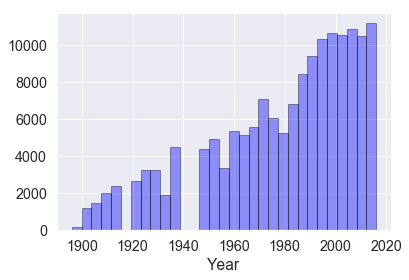

In [43]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)

# 15 points
# Task 3-a: Draw a histogram for total number of athletes participated in all Summer Olympic Games. 
# Think of a way to nicely visualize the all years of Summer Olympics! 
#########################begin code for Task 3-a
#df is a spare dataframe which stores data about athletes in "Summer" only
df = df_olympics[df_olympics['Season'].str.match('Summer')]
#dropping duplicates based on athlete name since we want the number of athletes
# Same athlete could have taken part in multiple events
df = df.drop_duplicates(['Year','Name'])
# Histogram with bins = 120/4 which corresponds to interval between successive olympic games
sns.distplot(df['Year'],hist=True, kde=False, 
             bins=int(124/4), color = 'blue',
             hist_kws={'edgecolor':'black'})
# seaborn kaavalante paidi esko...or matplotlib ante kindidi
#df.hist(column='Year',bins=31)
#########################end code for Task 3-a


# 15 points
# Task 3-b: Draw a "vertical" bar chart that lists the top-10 tallest althlets for all years.
# Remember to make the bar chart into a vertical bar chart
#########################begin code for Task 3-b 

#########################end code for Task 3-b

In [15]:
df_olympics[df_olympics['Year'] == 2012]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
98,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",NaN
134,48,Abdelhak Aatakni,M,24.0,NaN,64.0,Morocco,MAR,2012 Summer,2012,Summer,London,Boxing,Boxing Men's Light-Welterweight,NaN
164,67,Mariya Vasilyevna Abakumova (-Tarabina),F,26.0,179.0,80.0,Russia,RUS,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Javelin Throw,NaN
174,73,Luc Abalo,M,27.0,182.0,86.0,France,FRA,2012 Summer,2012,Summer,London,Handball,Handball Men's Handball,Gold
176,74,Mara Laura Abalo,F,30.0,182.0,73.0,Argentina,ARG,2012 Summer,2012,Summer,London,Rowing,Rowing Women's Coxless Pairs,NaN
197,91,Emanuele Abate,M,27.0,190.0,80.0,Italy,ITA,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 110 metres Hurdles,NaN
216,105,Ilyas Abbadi,M,19.0,175.0,75.0,Algeria,ALG,2012 Summer,2012,Summer,London,Boxing,Boxing Men's Welterweight,NaN
249,123,Sohail Abbas,M,37.0,178.0,80.0,Pakistan,PAK,2012 Summer,2012,Summer,London,Hockey,Hockey Men's Hockey,NaN
255,127,Shakeel Abbasi,M,28.0,165.0,60.0,Pakistan,PAK,2012 Summer,2012,Summer,London,Hockey,Hockey Men's Hockey,NaN


# Task 4: 
Find out an 'interesting' information from your Olympic History dataset. Create a visualization for it and explain in a few lines your reasoning. 

This task is worth 20 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visualization). 

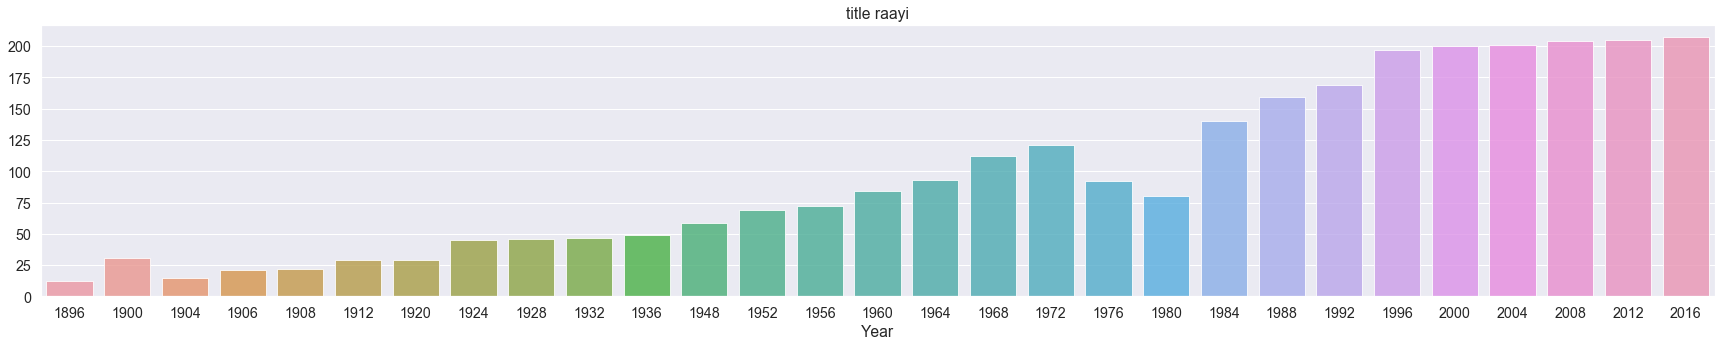

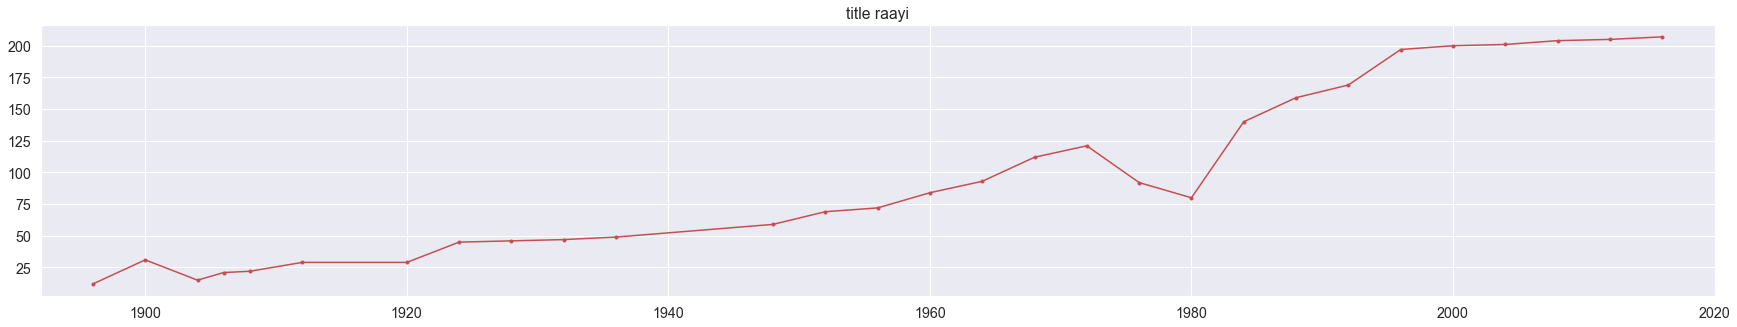

There are 42 cities in whicn Olympics was conducted since 1896


City
London                    3
Athina                    3
Los Angeles               2
Lake Placid               2
Innsbruck                 2
Paris                     2
Sankt Moritz              2
Stockholm                 2
Barcelona                 1
Beijing                   1
Berlin                    1
Calgary                   1
Atlanta                   1
Chamonix                  1
Cortina d'Ampezzo         1
Garmisch-Partenkirchen    1
Grenoble                  1
Helsinki                  1
Antwerpen                 1
Amsterdam                 1
Lillehammer               1
Vancouver                 1
Mexico City               1
Melbourne                 1
Sapporo                   1
Tokyo                     1
Sydney                    1
St. Louis                 1
Squaw Valley              1
Sochi                     1
Seoul                     1
Sarajevo                  1
Salt Lake City            1
Torino                    1
Roma                      1
Rio de Janeiro 

In [47]:
#########################begin code for Task 4

number_of_countries = df.groupby('Year')['NOC'].nunique()
plt.figure(figsize=(30,5))
sns.barplot(number_of_countries.index, number_of_countries.values, alpha=0.8)
plt.title("title raayi")
plt.show()



plt.figure(figsize=(30,5))
plt.plot(number_of_countries.index, number_of_countries.values, '.r-')
plt.title("title raayi")
plt.xlim(1892,2020)
plt.show()


#We see from the bar graph and connected scatterplot that the number of countries 
#participating in 1980 olympics was drastically lower than other years. This is
# because the 1980 olympics were held in Moscow and 66 Nations boycotted the games
# due to Soviet invasion on Afghanistan


# Code to print the number of cities and cities where olympics was held
print("There are {} cities in whicn Olympics was conducted since 1896".format(df_olympics["City"].value_counts().nunique()))
df_olympics.groupby(["City"])["Year"].nunique().sort_values(ascending=False)



# we see that only London and Athina have hosted the olympics thrice(maximum)
#df['Team'][df['Year'] ==2008].value_counts()
#########################end code for Task 4